## Jupyter notebook "Parker Ice Tongue collapse, Antarctica, triggered by loss of stabilizing land-fast sea ice"

This notebook creates figure 2 from the mentioned article (in review as November 2021). The figure is based on the Parker Ice Tongue estimated length from 1957 to 2020.

Different python libraries used

In [14]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker  
import numpy as np
import datetime as dt
import pandas as pd

Path to data

In [2]:
path = '../data/Parker_IT_len.txt'

Load data in Pandas and display

In [3]:
df = pd.read_csv(path, sep=' ', header=0, index_col=0)

In [4]:
df

,len
date,
1957-12-09,21070
1962-12-03,22000
1963-12-28,15760
1973-01-02,17960
1980-09-07,18880
1988-12-15,18460
1991-02-11,18850
2001-12-26,20520
2003-01-03,20620


### Organizing data and creation of new variables
Different operations are done to create the datetime index, length difference between dates , difference in days and rates of change per day and annum.

In [5]:
df['len_bkp'] = df.len

In [6]:
df.index = pd.to_datetime(df.index, yearfirst=True)

In [7]:
df['y1'] = df.index


In [8]:
arr = np.array([])
arr2 = []
ls = df.y1.to_list()
for d in arr:
    arr2.append(pd.Timestamp(dt.datetime.strptime(d, '%Y-%m-%d')))

for d in ls:
    arr2.append(d)
arr2.sort() 

In [9]:
diff_days = pd.DataFrame()
diff_days['time_1'] = np.array(df.index[0:-1])
diff_days['time_2'] = np.array(df.index[1:])
diff_days['diff_len'] =np.array(df.len[1:])-np.array(df.len_bkp[0:-1])
diff_days['diff_days'] = (np.array(df.index[1:])-np.array(df.index[0:-1]))/np.timedelta64(1,'D')
diff_days['meter_day'] = diff_days['diff_len']/diff_days['diff_days']
diff_days['meter_year'] = diff_days['meter_day']*365
diff_days.index = diff_days.time_1
df['len_km'] = df.len/1000


Display full data frame

In [10]:
diff_days

,time_1,time_2,diff_len,diff_days,meter_day,meter_year
time_1,,,,,,
1957-12-09,1957-12-09,1962-12-03,930,1820.0,0.510989,186.510989
1962-12-03,1962-12-03,1963-12-28,-6240,390.0,-16.000000,-5840.000000
1963-12-28,1963-12-28,1973-01-02,2200,3293.0,0.668084,243.850592
1973-01-02,1973-01-02,1980-09-07,920,2805.0,0.327986,119.714795
1980-09-07,1980-09-07,1988-12-15,-420,3021.0,-0.139027,-50.744786
1988-12-15,1988-12-15,1991-02-11,390,788.0,0.494924,180.647208
1991-02-11,1991-02-11,2001-12-26,1670,3971.0,0.420549,153.500378
2001-12-26,2001-12-26,2003-01-03,100,373.0,0.268097,97.855228
2003-01-03,2003-01-03,2005-01-19,410,747.0,0.548862,200.334672


### Preparing data for displaying on figure

In [11]:
arr = np.array([])
arr2 = []
ls = df.y1.to_list()
for d in arr:
    arr2.append(pd.Timestamp(dt.datetime.strptime(d, '%Y-%m-%d')))

for d in ls:
    arr2.append(d)
arr2.sort() 

print(arr2[10])
t05 = arr2[10]
arr2.pop(10)
print(arr2[-5])
t17 = arr2[-5]
arr2.pop(-5)
print(arr2[-4])
t18 = arr2[-4]
arr2.pop(-4)
print(arr2[-3])
t19 = arr2[-3]
arr2.pop(-3)
print(arr2[-2])
t20a = arr2[-2]
arr2.pop(-2)
print(arr2[-1])
t20b = arr2[-1]
arr2.pop(-1)

2005-02-13 00:00:00
2017-03-13 00:00:00
2018-02-12 00:00:00
2019-03-15 00:00:00
2020-02-14 00:00:00
2020-03-09 00:00:00


Timestamp('2020-03-09 00:00:00')

### Figure 2 of "Parker Ice Tongue collapse, Antarctica, triggered by loss of stabilizing land-fast sea ice"


In [12]:
font = {'family' : 'lato',
        'weight' : 'bold',
        'size'   : 18}

plt.style.use('seaborn-notebook')
plt.rc('font', **font)

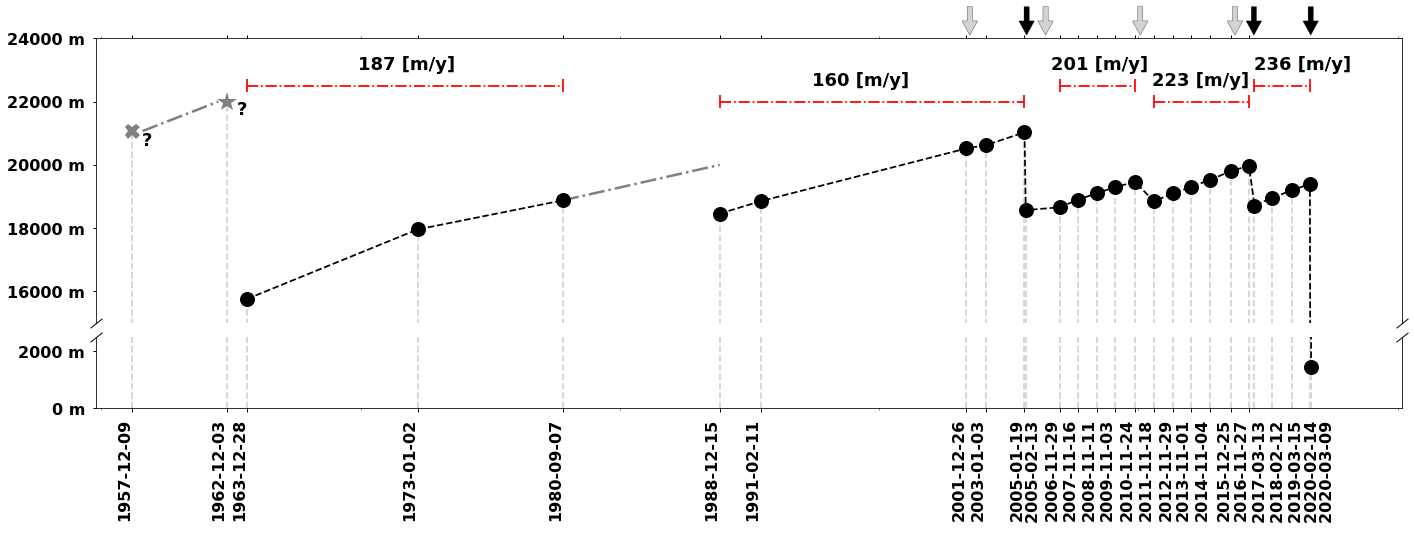

In [16]:

date_continuos = np.array(['1963-12-28', '1980-09-07', 
                           '1988-12-15','2005-01-19', 
                           '2006-11-29', '2010-11-24', 
                           '2011-11-18','2016-11-27',
                           '2017-03-13', '2020-02-14'])

# Two subplots are needed in order to generate the broken y axis
fig, (ax, ax2)  = plt.subplots(2,1, sharex=True, figsize=(12,8),
                               gridspec_kw={'height_ratios': [4, 1]})


#Plot same data when needed in both plots (ax and ax2)
ax.plot([pd.to_datetime('1958-06-25'),pd.to_datetime('1962-06-25')],
        [df.len_bkp['1957-12-09'],df.len_bkp['1962-12-03']], 
        ls='-.', 
        lw=2.5,
        color='grey')


ax2.plot([pd.to_datetime('1958-06-25'),pd.to_datetime('1962-06-25')],
        [df.len_bkp['1957-12-09'],df.len_bkp['1962-12-03']], 
        ls='-.', 
        lw=2.5,
        color='grey')


ax.plot([df.y1['1980-09-07'],df.y1['1988-12-15']],
        [df.len_bkp['1980-09-07'],20000], 
        ls='-.', 
        lw=2.5,
        color='grey')


df['1988-12-15':'2020-03-09'].plot(ax =ax, style='.--', 
        y='len_bkp', 
        x='y1', 
        c='black', 
        xlim=('1956-01-01','2025-01-01'),
        ylim=(14000, 23000), #14000
        figsize = (18,8), 
        ms=30)


df['1988-12-15':'2020-03-09'].plot(ax =ax2, style='.--', 
        y='len_bkp', 
        x='y1', 
        c='black', 
        xlim=('1956-01-01','2025-01-01'),
        ylim=(14000, 23000), #14000
        figsize = (18,8), 
        ms=30)


df['1963-12-28':'1980-09-07'].plot(ax = ax , style='.--', 
        y='len_bkp', 
        x='y1', 
        c='black', 
        #xlim=('1956-01-01','2025-01-01'),
        #ylim=(0, 23000),
        figsize = (20,8), 
        ms=30)

df['1962-12-03':'1963-12-03'].plot(ax = ax , style='.--', 
        y='len_bkp', 
        x='y1', 
        c='gray',
        marker = '*',                               
        #xlim=('1960-01-01','2025-01-01'),
        #ylim=(0, 23000),
        #figsize = (20,8), 
        ms=20)

df['1957-12-09':'1957-12-09'].plot(ax = ax , style='.--', 
        y='len_bkp', 
        x='y1', 
        c='gray',
        marker = 'X',                               
        #xlim=('1960-01-01','2025-01-01'),
        #ylim=(0, 23000),
        #figsize = (20,8), 
        ms=15)

ax.set_xlabel(' ', size=20)
ax.set_xticks(arr2)

ax2.set_xlabel(' ', size=20)
ax2.set_xticks(arr2)

ax.get_legend().remove()
ax2.get_legend().remove()

#Break y axis at:
ax.set_ylim(15000, 24000) 
ax2.set_ylim(0, 2500)

# hide the spines between ax and ax2
ax.spines['bottom'].set_visible(False)
ax2.spines['top'].set_visible(False)

#Dealing with ticks in x axis
ax.xaxis.tick_top()
ax.tick_params(labeltop=False) 
ax2.xaxis.tick_bottom()            

for i, date in enumerate(df.y1):
    ax.vlines(date, 0, df.len_bkp[i], linestyle='--', color='lightgrey')
    ax2.vlines(date, 0, df.len_bkp[i], linestyle='--', color='lightgrey')


for date in date_continuos[(date_continuos != '1963-12-28') &
                           (date_continuos != '1980-09-07') &
                           (date_continuos != '2010-11-24') &
                           (date_continuos != '2006-11-29') &
                           (date_continuos != '2017-03-13') &
                           (date_continuos != '2020-02-14')
                           ]: 
    ax.vlines(date, 21800, 22200, linestyle='-', color='red')

ax.vlines(date_continuos[0], 22300, 22700, linestyle='-', color='red')
ax.vlines(date_continuos[1], 22300, 22700, linestyle='-', color='red')  
    
ax.vlines(date_continuos[4], 22300, 22700, linestyle='-', color='red')
ax.vlines(date_continuos[5], 22300, 22700, linestyle='-', color='red')

ax.vlines(date_continuos[8], 22300, 22700, linestyle='-', color='red')
ax.vlines(date_continuos[9], 22300, 22700, linestyle='-', color='red')

ax.hlines(22500, date_continuos[0], date_continuos[1], linestyle='-.', color='red')  
ax.hlines(22000, date_continuos[2], date_continuos[3], linestyle='-.', color='red')    
ax.hlines(22500, date_continuos[4], date_continuos[5], linestyle='-.', color='red')    
ax.hlines(22000, date_continuos[6], date_continuos[7], linestyle='-.', color='red')
ax.hlines(22500, date_continuos[8], date_continuos[9], linestyle='-.', color='red')    


ax.text(pd.to_datetime('1972-06-01'), 23000, '187 [m/y]', size=18, ha = 'center' )
ax.text(pd.to_datetime('1996-06-01'), 22500, '160 [m/y]', size=18, ha = 'center' )
ax.text(pd.to_datetime('2009-01-01'), 23000, '201 [m/y]', size=18, ha = 'center' )
ax.text(pd.to_datetime('2014-05-01'), 22500, '223 [m/y]', size=18, ha = 'center' )
ax.text(pd.to_datetime('2019-10-01'), 23000, '236 [m/y]', size=18, ha = 'center' )


t = str(t05).split(' ')[0]    
ax2.text(pd.to_datetime('2005-02-19'), -240, f'{t} ' , rotation=90, va ='top', size=16)

t = str(t17).split(' ')[0]    
ax2.text(pd.to_datetime('2017-02-03'), -240, f'{t} ' , rotation=90, va ='top', size=16)

t = str(t18).split(' ')[0]    
ax2.text(pd.to_datetime('2018-02-03'), -240, f'{t} ' , rotation=90, va ='top', size=16)

t = str(t19).split(' ')[0]    
ax2.text(pd.to_datetime('2019-01-15'), -240, f'{t} ' , rotation=90, va ='top', size=16)

t = str(t20a).split(' ')[0]    
ax2.text(pd.to_datetime('2019-11-03'), -240, f'{t} ' , rotation=90, va ='top', size=16)  

t = str(t20b).split(' ')[0]    
ax2.text(pd.to_datetime('2020-09-03'), -240, f'{t} ' , rotation=90, va ='top', size=16)  

ax.text(pd.to_datetime('1963-06-25'), 21590, '?', size=18)
ax.text(pd.to_datetime('1958-06-09'), 20600, '?', size=18)  


# Arrow position for complete fast-ice break-off
fl = ['2002-03-01',  '2006-03-01', '2011-03-01', '2016-03-01', ]
fl_long = ['2005-03-01','2017-03-01', '2020-03-01']


ax.tick_params(labelsize=16)
ax2.tick_params(labelsize=16)

#plt.xticks(rotation=70)

plt.setp(ax2.get_xticklabels(),
         rotation=90,
         horizontalalignment='right')

for f in fl:
    ax.arrow(x = f, 
             y = 25000, 
             dx = 0, 
             dy = -900, 
             width=100, 
             length_includes_head=True,
             ec='black', 
             fc ='lightgray',
             clip_on = False
            )

for f in fl_long:
    ax.arrow(x = f, 
             y = 25000, 
             dx = 0, 
             dy = -900, 
             width=100, 
             length_includes_head=True,
             ec='black', 
             fc ='black',
             clip_on = False
            )


d = .8  # proportion of vertical to horizontal extent of the slanted lines of the broken y axis
kwargs = dict(marker=[(-1, -d), (1, d)], markersize=12,
              linestyle="none", color='k', mec='k', mew=1, clip_on=False)
ax.plot([0, 1], [0, 0], transform=ax.transAxes, **kwargs)
ax2.plot([0, 1], [1, 1], transform=ax2.transAxes, **kwargs)

ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%.0f m'))
ax2.yaxis.set_major_formatter(ticker.FormatStrFormatter('%.0f m'))

plt.tight_layout(h_pad=0.1)
plt.show()

Broken y axis taken from https://matplotlib.org/stable/gallery/subplots_axes_and_figures/broken_axis.html